<a href="https://www.kaggle.com/code/shaikhabdulrafay03/bank-churn-dataset?scriptVersionId=158805195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Table of conttent
- [Reading the data](eda)
- [Preprocessing](pre)
- [Data Wrangling](dw)
- [Modeling](model)

# Reading the dataset
<a id= eda></a>

In [2]:
df = pd.read_csv(r"/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv(r"/kaggle/input/playground-series-s4e1/test.csv")
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (165034, 14)
number of Columns:  14
number of Observations:  165034
Number of values in df:  2310476
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [6]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [7]:
df.describe(include='O')

Surname Geography  Gender
count   165034    165034  165034
unique    2797         3       2
top       Hsia    France    Male
freq      2456     94215   93150

In [8]:

fig = make_subplots(rows=2, cols=2 ,subplot_titles=['Geography','Gender' , 'Surname'] )
# Add histograms
fig.add_trace(go.Histogram(x=df['Geography']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Gender']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Surname']), row=2, col=1)

# Show the plot
fig.show()

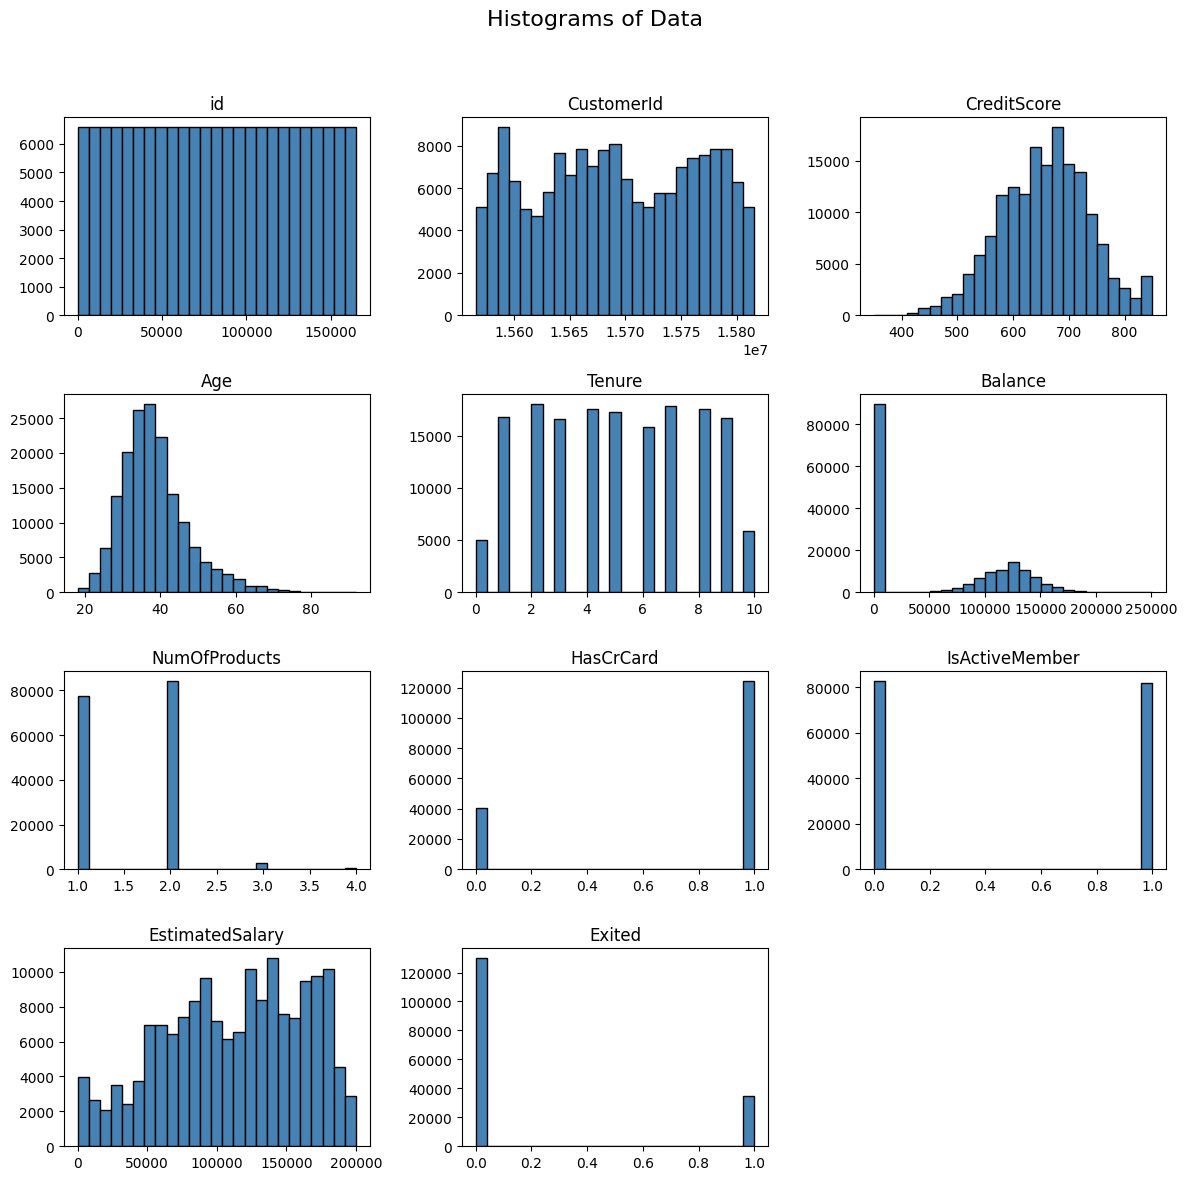

In [9]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [10]:
feature = []
for i in df.columns:
    if df[i].nunique() > 11  and df[i].dtype != 'object':
        feature.append(i)

feature.remove('CustomerId')
feature

['id', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# PreProcessing
<a id= pre></a>

## Finding outliers


In [11]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.1 , random_state=42)
IF.fit(df[feature])
df['anomaly_scores'] = IF.decision_function(df[feature])
df['anomaly'] = IF.predict(df[feature])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [12]:
df['anomaly'].value_counts()

anomaly
 1    148530
-1     16504
Name: count, dtype: int64

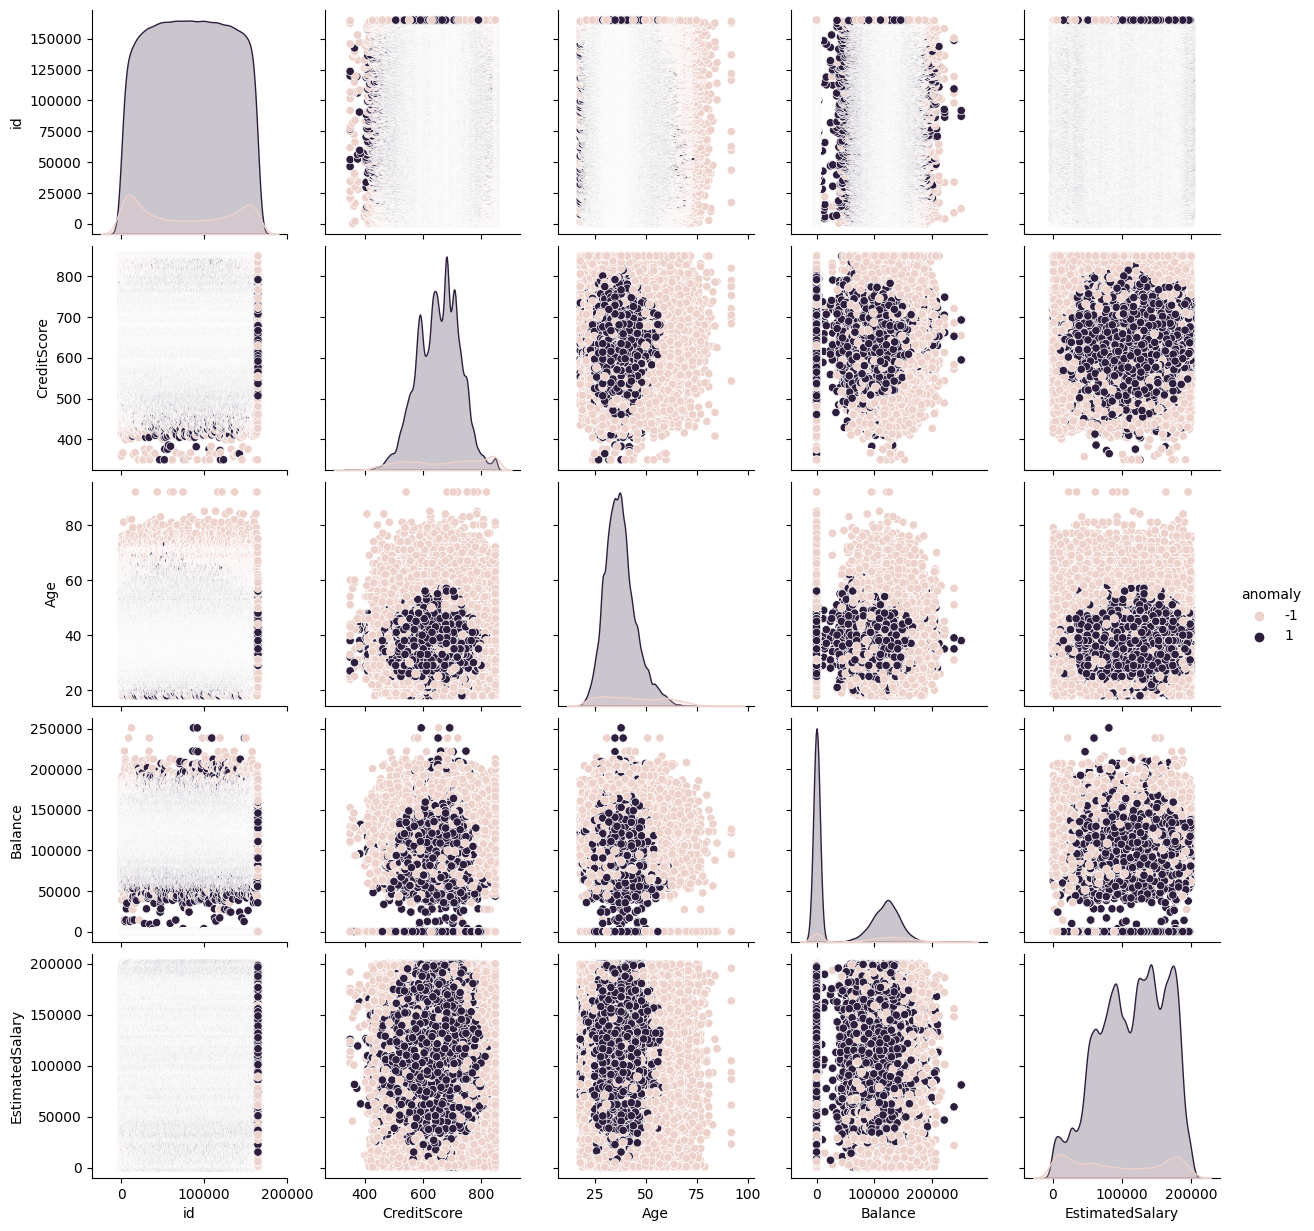

In [13]:
sns.pairplot(df , vars=feature ,hue= 'anomaly')

In [14]:
df.drop(df.loc[df['anomaly']==-1].index, inplace=True)
df.reset_index()
df.drop(['anomaly' , 'anomaly_scores' ], axis = 1 , inplace= True)
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
5            5    15771669        Genovese          588   Germany    Male   
...        ...         ...             ...          ...       ...     ...   
165024  165024    15734886          Martin          592   Germany  Female   
165025  165025    15687079           T'ang          635    France  Female   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
5       36.0       4  131778.58              1        1.0             0.0   
...      ...     ...        ...            ...        ...             ...   
165024  33.0       3  110993.29              2        1.0             1.0   
165025  38.0       9       0.00              2        1.0             1.0   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
5             136024.31       1  
...                 ...     ...  
165024        176747.66       1  
165025        167558.27       0  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  

[148530 rows x 14 columns]

## Normalizing the data

In [15]:
df[feature].skew()

id                -0.005973
CreditScore       -0.140188
Age                0.659008
Balance            0.448979
EstimatedSalary   -0.301499
dtype: float64

In [16]:
df['Age'] = df['Age'].apply(lambda x: np.log(x))

In [17]:
df[feature].skew()

id                -0.005973
CreditScore       -0.140188
Age                0.027432
Balance            0.448979
EstimatedSalary   -0.301499
dtype: float64

## LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_surname = pd.concat([df['Surname'], test['Surname']], ignore_index=True)
le.fit(combined_surname)
df['Surname'] = le.transform(df['Surname'])
test['Surname'] = le.transform(test['Surname'])

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
test['Gender'] = le.transform(test['Gender'])

le.fit(df['Geography'])
df['Geography'] = le.transform(df['Geography'])
test['Geography'] = le.transform(test['Geography'])

       

In [19]:
# ft = ['Geography' , 'Gender']
# df = pd.get_dummies(df , columns= ft)
# test = pd.get_dummies(test , columns= ft)

In [20]:
# df.drop('Gender_Female' , axis=1 , inplace= True)
# df.drop('Geography_Spain' , axis=1 , inplace= True)

# test.drop('Gender_Female' , axis=1 , inplace= True)
# test.drop('Geography_Spain' , axis=1 , inplace= True)

In [21]:
df

id  CustomerId  Surname  CreditScore  Geography  Gender       Age  \
0            0    15674932     1976          668          0       1  3.496508   
1            1    15749177     1977          627          0       1  3.496508   
2            2    15694510     1207          678          0       1  3.688879   
3            3    15741417     1330          581          0       1  3.526361   
5            5    15771669      964          588          1       1  3.583519   
...        ...         ...      ...          ...        ...     ...       ...   
165024  165024    15734886     1649          592          1       0  3.496508   
165025  165025    15687079     2508          635          0       0  3.637586   
165029  165029    15667085     1745          667          2       0  3.496508   
165030  165030    15665521     1970          792          0       1  3.555348   
165031  165031    15664752     1201          565          0       1  3.433987   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0            3       0.00              2        1.0             0.0   
1            1       0.00              2        1.0             1.0   
2           10       0.00              2        1.0             0.0   
3            2  148882.54              1        1.0             1.0   
5            4  131778.58              1        1.0             0.0   
...        ...        ...            ...        ...             ...   
165024       3  110993.29              2        1.0             1.0   
165025       9       0.00              2        1.0             1.0   
165029       2       0.00              1        1.0             1.0   
165030       3       0.00              1        0.0             0.0   
165031       5       0.00              1        1.0             1.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
5             136024.31       1  
...                 ...     ...  
165024        176747.66       1  
165025        167558.27       0  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  

[148530 rows x 14 columns]

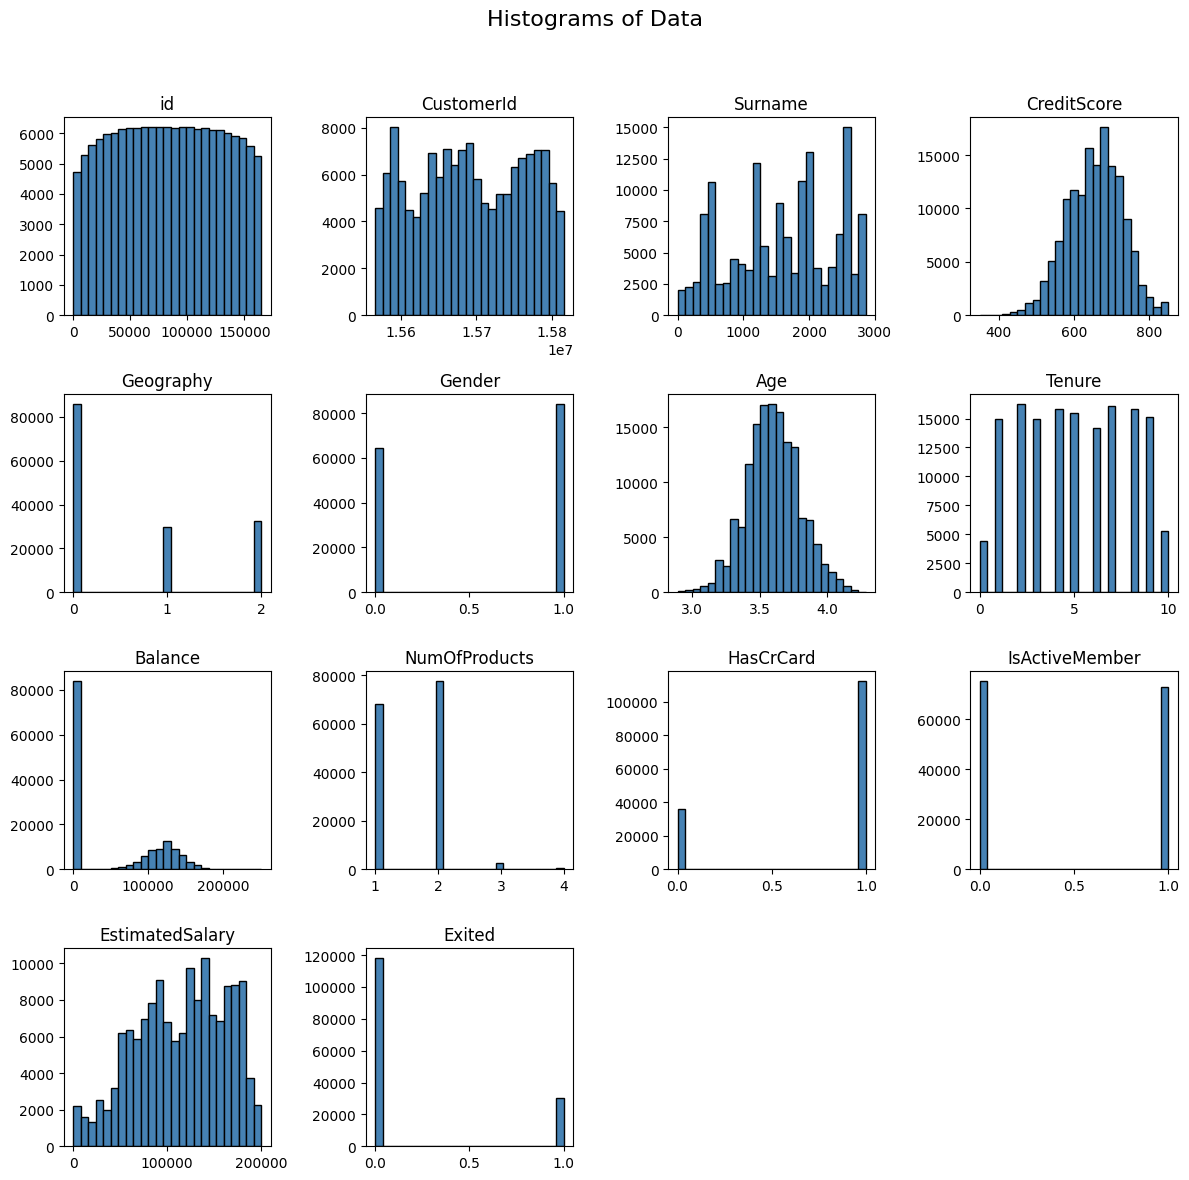

In [22]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [23]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    77611
1    68047
3     2477
4      395
Name: count, dtype: int64

In [24]:
df['Balance'].value_counts()

Balance
0.00         84053
124577.33       78
127864.40       60
122314.50       58
129855.32       55
             ...  
118633.84        1
145853.97        1
91219.13         1
97440.91         1
110993.29        1
Name: count, Length: 27621, dtype: int64

In [25]:
def new_bal(value):
    if value == 0 :
        return 0
    else:
        return 1

df['New_Bal'] = df['Balance'].apply(new_bal)
test['New_Bal'] = test['Balance'].apply(new_bal)


In [26]:
df.value_counts(['New_Bal' , 'Exited'])

New_Bal  Exited
0        0         70823
1        0         47449
         1         17028
0        1         13230
Name: count, dtype: int64

# Correlations
<a id= cor></a>

In [27]:
correlation_matrix = df.corr()

correlations = correlation_matrix['Exited']
sorted_features = correlations.abs().sort_values(ascending=False)
correlation_df = pd.DataFrame({
    'Feature': sorted_features.index,
    'Correlation with Target': sorted_features.values
})

correlation_df

Feature  Correlation with Target
0            Exited                 1.000000
1               Age                 0.357466
2     NumOfProducts                 0.223516
3    IsActiveMember                 0.207617
4            Gender                 0.146975
5           New_Bal                 0.131297
6           Balance                 0.127876
7         Geography                 0.052386
8       CreditScore                 0.033239
9           Surname                 0.027165
10  EstimatedSalary                 0.027121
11        HasCrCard                 0.021390
12           Tenure                 0.019577
13       CustomerId                 0.010325
14               id                 0.003974

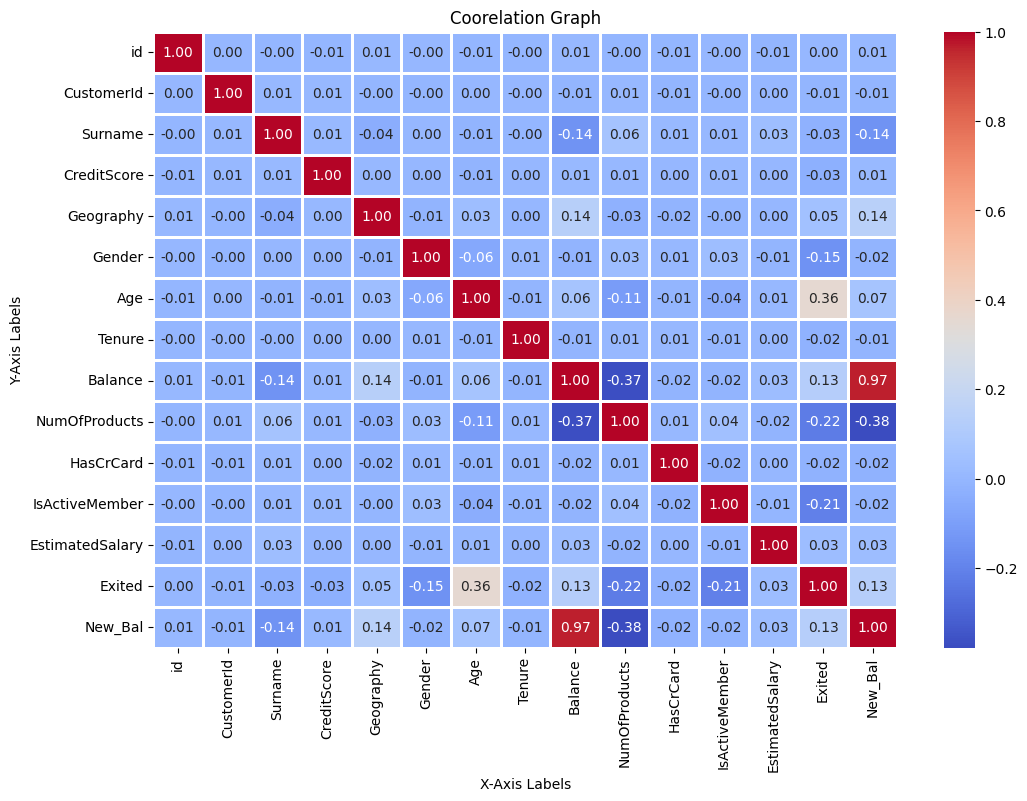

In [28]:
data = df.corr()

plt.figure(figsize=(12, 8))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})

#Add labels and title (customize as needed)
plt.xlabel("X-Axis Labels")
plt.ylabel("Y-Axis Labels")
plt.title("Coorelation Graph")

#Show the plot
plt.show()

In [29]:
df.drop('Balance' , axis =1 , inplace = True)
test.drop('Balance' , axis =1 , inplace = True)

In [30]:
y = df.pop('Exited')

# Data Wrangling
<a id= dw></a>

## Feature Selction


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(f_classif, k=10)
x = kbest.fit_transform(df, y)

print('Selected features:',  df.columns[kbest.get_support()].tolist())

Selected features: ['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'New_Bal']


In [32]:
l = ['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'New_Bal']
for i in test.columns:
    if i not in l:
        if i != 'id':
            test.drop(i , axis = 1 , inplace = True)
test

id  Surname  CreditScore  Geography  Gender   Age  NumOfProducts  \
0       165034     1568          586          0       0  23.0              2   
1       165035     1919          683          0       0  46.0              1   
2       165036     1320          656          0       0  34.0              2   
3       165037     1939          681          0       1  36.0              1   
4       165038     1145          752          1       1  38.0              1   
...        ...      ...          ...        ...     ...   ...            ...   
110018  275052     2041          570          2       1  29.0              1   
110019  275053      615          575          0       0  36.0              1   
110020  275054      432          712          0       1  31.0              2   
110021  275055     2813          709          0       0  32.0              1   
110022  275056     2602          621          0       0  37.0              1   

        HasCrCard  IsActiveMember  EstimatedSalary  New_Bal  
0             0.0             1.0        160976.75        0  
1             1.0             0.0         72549.27        0  
2             1.0             0.0        138882.09        0  
3             1.0             0.0        113931.57        0  
4             1.0             0.0        139431.00        1  
...           ...             ...              ...      ...  
110018        1.0             1.0        148087.62        1  
110019        1.0             1.0         42181.68        1  
110020        1.0             0.0         16287.38        0  
110021        1.0             1.0        158816.58        0  
110022        1.0             0.0         24210.56        1  

[110023 rows x 11 columns]

In [33]:
tets_id = test.pop('id')

## Feature Balancing


In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
re_x , re_y = ros.fit_resample(x , y)

In [35]:
re_y.value_counts()

Exited
0    118272
1    118272
Name: count, dtype: int64

In [36]:
re_x

array([[1.9760000e+03, 6.6800000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.8144997e+05, 0.0000000e+00],
       [1.9770000e+03, 6.2700000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        4.9503500e+04, 0.0000000e+00],
       [1.2070000e+03, 6.7800000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.8486669e+05, 0.0000000e+00],
       ...,
       [1.7670000e+03, 7.9000000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        1.8786655e+05, 1.0000000e+00],
       [1.4900000e+03, 6.7800000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.3044665e+05, 0.0000000e+00],
       [1.7100000e+03, 6.7700000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.3128398e+05, 0.0000000e+00]])

## Standardizing

In [37]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(re_x)

df = sc.transform(re_x)
test = sc.transform(test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



# Modeling
<a id= model></a>

In [38]:
from sklearn.model_selection import train_test_split 
xtrain , xtest , ytrain , ytest = train_test_split(df , re_y , train_size= 0.8)

In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = [{'n_estimators': [50, 100, 200], 
#                 'max_depth': [None, 10, 20], 
#                 'min_samples_split': [2, 5, 10], 
#                 'min_samples_leaf': [1, 2, 4]}]
    
# rf = RandomForestClassifier()

# grid_search = GridSearchCV(estimator=rf , param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(xtrain, ytrain)

# best_model = grid_search.best_estimator_

# print(best_model.score(xtrain , ytrain))
# print(best_model.score(xtest , ytest))


In [40]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100 , max_depth= 10, min_samples_split = 5 ,   min_samples_leaf =  2 )

# rf.fit(xtrain , ytrain)
# print(rf.score(xtrain,ytrain))
# print(rf.score(xtest , ytest))

# 0.8017880137636951
# 0.7947521742801655

In [41]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

train_data = lgb.Dataset(xtrain, label=ytrain)
test_data = lgb.Dataset(xtest, label=ytest, reference=train_data)



params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.08,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 1500
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10, verbose_eval=10)

# Make predictions on the test set
y_pred = bst.predict(xtest, num_iteration=bst.best_iteration)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Display additional metrics
# print("Classification Report:\n", classification_report(y_test, y_pred_binary))


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 94614, number of negative: 94621
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 189235, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499982 -> initscore=-0.000074
[LightGBM] [Info] Start training from score -0.000074
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.507641
[20]	valid_0's binary_logloss: 0.447223
[30]	valid_0's binary_logloss: 0.426999
[40]	valid_0's binary_logloss: 0.418743
[50]	valid_0's binary_logloss: 0.414445
[60]	valid_0's binary_logloss: 0.411495
[70]	valid_0's binary_logloss: 0.408783
[80]	valid_0's binary_logloss: 0.406975
[90]	valid_0's binary_logloss: 0.405386
[100]	valid_0's bi

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
xgb = XGBClassifier()
xgb_model = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
xgb_model.fit(xtrain, ytrain)

print("Best Hyperparameters:", xgb_model.best_params_)
print(xgb_model.score(xtrain , ytrain))
print(xgb_model.score(xtest , ytest))



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
0.8746320712341797
0.8475554334270434


In [43]:
xgb = XGBClassifier(objective="binary:logistic" , learning_rate =  0.2, max_depth =  7, n_estimators =  200)
xgb.fit(df, re_y)
y=(np.round_(xgb.predict_proba(test), decimals=1))

In [44]:
s = {
    'id' :tets_id ,
    'Exited' :[val[1] for val in y]
}
sub = pd.DataFrame(s)
sub

id  Exited
0       165034     0.2
1       165035     0.6
2       165036     0.9
3       165037     0.5
4       165038     0.9
...        ...     ...
110018  275052     0.1
110019  275053     0.1
110020  275054     0.4
110021  275055     0.4
110022  275056     0.9

[110023 rows x 2 columns]

In [45]:
sub.describe()

id         Exited
count  110023.000000  110023.000000
mean   220045.000000       0.459942
std     31761.048671       0.328587
min    165034.000000       0.000000
25%    192539.500000       0.100000
50%    220045.000000       0.400000
75%    247550.500000       0.800000
max    275056.000000       1.000000

In [46]:
sub.to_csv('submission.csv', index=False)
